# Umělé neuronové sítě typu MLP


## Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def show_loss(iterations, loss, epoch=False):
    plt.plot(iterations, loss)
    plt.xlabel("Epocha" if epoch else "Iterace")
    plt.ylabel("Loss")
    plt.title("Průběh trénování")
    plt.show()


npzfile = np.load("data/data_10.npz")
npzfile.files


['x', 'xTest', 'y', 'yTest', 'w1', 'w2']

In [2]:
x = npzfile["x"]
xTest = npzfile["xTest"]

y = npzfile["y"]
yTest = npzfile["yTest"]

print(f"{x.shape=}")
print(f"{y.shape=}")
print(f"Počet tříd: {np.max(y) + 1}")

w1test = npzfile["w1"]
w2test = npzfile["w2"]

x.shape=(4500, 400)
y.shape=(4500, 1)
Počet tříd: 10


## Stavební bloky sítě

### Funkce sigmoid

$$ sigmoid(u) = \sigma (u) = \frac{e^u}{1+e^u} = \frac{1}{1+e^{-u}} $$


In [3]:
def sigmoid(u):
    return 1 / (1 + np.exp(-u))


In [4]:
# Kontrola:
u = np.array([[1, 2], [-3, -4]])
sigmoid(u)

array([[0.73105858, 0.88079708],
       [0.04742587, 0.01798621]])

#### Derivace funkce sigmoid:
$$ \sigma' (u) = \sigma (u) (1 - \sigma(u)) $$

In [5]:
def sigmoid_grad(u):
    return sigmoid(u) * (1 - sigmoid(u))


In [6]:
# Kontrola:
sigmoid_grad(u)

array([[0.19661193, 0.10499359],
       [0.04517666, 0.01766271]])

### ReLU

$$ f(u) = max(0, u) $$



In [7]:
def relu(u):
    return np.maximum(0, u)

In [8]:
# Kontrola:
relu(u)

array([[1, 2],
       [0, 0]])

#### Derivace funkce ReLU:
$$ f'(x) = \boldsymbol{1} (x \ge 0)$$

Derivace přímo v bodě nula je dodefinována na hodnotu nula.

Gradient se přes tento blok přenáší:
1) Nezměněný, pokud je hodnota na vstupu z dopředného průchodu větší než nula.
2) Přenesená hodnota je nula, pokud je hodnota na vstupu z dopředného průchodu menší nebo rovna nule.

In [9]:
def relu_grad(u):
    return (u >= 0).astype(bool)

In [10]:
# Kontrola:
relu_grad(u)

array([[ True,  True],
       [False, False]])

### One Hot Encoding
$ \pi $ nabývá hodnoty 1 pouze pro jednu třídu. Např. máme celkem 3 třídy (0, 1, 2): $\pi_0 = [0,1,0]$  pro $y_0 = 1$


$$
    classes = 
        \begin{bmatrix}
        1 \\
        0 \\
        2\\
        1 \\
        \end{bmatrix} 
    \implies
        \pi = 
        \begin{bmatrix}
        0 & 1 & 0 \\
        1 & 0 & 0 \\
        0 & 0 & 1 \\
        0 & 1 & 0 \\
        \end{bmatrix} 
$$

In [11]:
def one_hot_encoding(data):
    class_count = np.max(data) + 1
    res = np.zeros((data.shape[0], class_count))
    for index, n in enumerate(data):
        res[index, n[0]] = 1
    return res

In [12]:
# Kontrola:
encoded = one_hot_encoding(y)
encoded[[0, 900, 1800, 2700, 3500, 4200], :]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

### Softmax

- Funkce softmax má c vstupů a c výstupů. 
- Všechny výstupy jsou kladná čísla. 
- Součet všech výstupů dohromady je roven číslu 1.
$$\widehat{y_c} = softmax(u) = \frac{e^{u_c}}{\sum_{d=0}^{c} {e^{u_d}}} $$


In [13]:
def softmax(u):
    return np.exp(u) / np.sum(np.exp(u), axis=1, keepdims=True)

In [14]:
# Kontrola:
softmax(u)

array([[0.26894142, 0.73105858],
       [0.73105858, 0.26894142]])

In [15]:
def theta_grad(grad_on_output, input_data):
    weight_grad = grad_on_output.T @ input_data
    bias_grad = np.sum(grad_on_output, axis=0)
    return weight_grad, bias_grad

In [16]:
# test vypoctu gradientu pro matici vah a biasy

# dva vstupni vektory, kazdy ma 4 hodnoty, cili jde o vrstvu, kde kazdy neuron ma 4 vstupy
input_test = np.array([[7, 8, 4, 1], [9, 10, 4, 2]])
print("input_test")
print(input_test.shape)

# dva gradienty na vystupu, kazdy ma 3 hodnoty, cili jde o vrstvu, ktera ma 3 neurony [a kazdy ma 4 vstupy])
grad_on_output_test = np.array([[1, 2, 3], [4, 2, 6]])
print("grad_on_output_test")
print(grad_on_output_test.shape)

w_grad_test, u_grad_test = theta_grad(grad_on_output_test, input_test)

# gradienu vektoru vah ma tedy rozmery 3*4
print("w_grad_test")
print(w_grad_test.shape)
print(w_grad_test)

# gradient biasu ma 3 hodnoty
print("u_grad")
print(u_grad_test.shape)
print(u_grad_test)

input_test
(2, 4)
grad_on_output_test
(2, 3)
w_grad_test
(3, 4)
[[43 48 20  9]
 [32 36 16  6]
 [75 84 36 15]]
u_grad
(3,)
[5 4 9]


## Sítě typu vícevrstvý perceptron = Multi-Layer Perceptron (MLP)



### Předzpracování dat
Pro trénování neuronových sítí je vhodné provádět standardizaci dat na nulovou střední hodnotu a jednotkový rozptyl.

### Inicializace parametrů (váhových koeficientů)
- Váhy neuronů nesmí být nastaveny na stejné hodnoty (např. 0), aby neměly stejnou hodnotu výstupu a stejný gradient
=>
- Je třeba porušit symetrii:
    - Váhy se inicializují jako malá náhodná čísla (polovina kladná, polovina záporná)
    - V praxi se pro ReLU používá hodnota $randn(n) * sqrt(2.0/n)$, kde n je počet vstupů neuronu
    - Započítání počtu vstupů pak zajišťuje, že neurony s různým počtem vstupů mají výstup se stejným rozptylem hodnot
    - Biasy se inicializují na hodnotu 0 nebo 0.01 (symetrie je již porušena inicializací váhových koeficientů)

### Dopředný průchod
Kroky:
1. $x_1$ je $x$ rozšířená o sloupec bias
2. $u_1 = \theta_1^T x_1$ (vstupní vrstva)
3. $a_1 = ReLU(u_1)$ (aktivační funkce, v kódu použijte obecně `activation_function`)
4. $x_2$ je $a_1$ rozšířená o sloupec bias
5. $u_2 = \theta_2^T x_2$ (skrytá vrstva)
6. $\tilde{y} = softmax(u_2)$ (výstupní vrstva)

Na výstupu vznikne podle zvoleného kritéria chyba či odchylka.

### Zpětný průchod

(Hodnoty z dopředného průhodu $x$, $a_1$ a $u_2$ je vhodné si z dopředného průchodu uložit.)

1. $du_2 = softmax(u_2)-\pi(y)$

2. $dW_2 = du_2 a_1^T$  a  $db_2 = du_2 $

3. $da_1 = W_2^T du_2$

4. $du_1 = da_1 \odot relu'(du_1)$ (v kódu použijte obecně `activation_function_derivation`)

5. $dW_1 = du_1^T x$  a  $db = du_1 $

In [17]:
class TwoLayerPerceptron:
    def __init__(
        self,
        *,
        input_layer_size,
        hidden_layer_size,
        output_size,
        activation_function,
        activation_function_derivation,
    ):
        #################################################################
        # ZDE DOPLNIT
        rand1 = np.random.randn(input_layer_size + 1, hidden_layer_size)
        self.w1 = rand1 * np.sqrt(2.0 / input_layer_size)
        self.w1[0, :] = 0  # nebo 0.01
        rand2 = np.random.randn(hidden_layer_size + 1, output_size)
        self.w2 = rand2 * np.sqrt(2.0 / hidden_layer_size)
        self.w2[0, :] = 0  # nebo 0.01

        self.activation_function = activation_function
        self.activation_function_derivation = activation_function_derivation
        #################################################################

    def forward(self, x) -> tuple[np.ndarray, dict]:
        """Spočítá predikci na základě aktuálních vah."""

        #################################################################
        # ZDE DOPLNIT

        ones = np.ones((x.shape[0], 1))
        # 1. vrstva
        x1 = np.hstack((ones, x))  # nezapomente na bias(prvni sloupec) #4500x401
        u1 = x1 @ self.w1

        # aktivacni funkce pomocí funkce self.activation_function
        a1 = self.activation_function(u1)  # 4500x25

        # 2. vrstva (skryta vrstva)
        x2 = np.hstack((ones, a1))  # 4500x26
        u2 = x2 @ self.w2

        # vystup po softmaxu
        scores = softmax(u2)  # 4500x10 scores pro kazdou tridu

        # cache
        forward_cache = {
            "x1": x1,
            "u1": u1,
            "a1": a1,
            "x2": x2,
            "u2": u2,
            "scores": scores,
        }
        #################################################################

        # forward_cache je dictionary obsahující uložené hodnoty potřebné pro zpětný průchod
        return scores, forward_cache

    def backward(self, classes, forward_cache: dict) -> dict:
        """Vypočítá gradienty na základě hodnot uložených při dopředném průchodu."""

        #################################################################
        # ZDE DOPLNIT

        # pomocí self.scores, self.classes a one_hot_encoding
        du2 = forward_cache["scores"] - one_hot_encoding(classes)

        # pomocí funkce theta_grad
        dw2_full, db2 = theta_grad(du2, forward_cache["x2"])
        dw2 = dw2_full[:, 1:]
        da1_full = du2 @ self.w2.T
        da1 = da1_full[:, 1:]

        # pomocí funkce self.activation_function_derivation
        # POZOR: tato funce se musí aplikovat na vstupní hodnotu z dopředného průchodu !!
        du1 = da1 * self.activation_function_derivation(forward_cache["u1"])

        # pomocí funkce theta_grad
        dw1_full, db1 = theta_grad(du1, forward_cache["x1"])
        dw1_full = dw1_full
        dw1 = dw1_full[:, 1:]

        gradients = {
            "du2": du2,
            "dw2": dw2,
            "db2": db2,
            "da1": da1,
            "du1": du1,
            "dw1": dw1,
            "db1": db1,
        }
        #################################################################

        # gradients je dictionary obsahující vypočtené gradienty
        return gradients

    def update_weights_gd(self, gradients: dict, alpha, lmbd=0):
        """
        Aktualizuje váhy sítě na základě vypočtených gradientů.
        """

        #################################################################
        # ZDE DOPLNIT

        # POZOR: dw2 není gradient celé matice w2 ale pouze její části
        # gradient celé matice w2 pro update vah vznikne vhodným spojením dw2 a db2
        db2_reshaped = gradients["db2"].reshape(1, -1)
        dw2_transposed = gradients["dw2"].T
        full_grad_w2 = np.vstack((db2_reshaped, dw2_transposed))
        self.w2 -= alpha * full_grad_w2

        db1_reshaped = gradients["db1"].reshape(1, -1)
        dw1_transposed = gradients["dw1"].T
        full_grad_w1 = np.vstack((db1_reshaped, dw1_transposed))
        self.w1 -= alpha * full_grad_w1

        #################################################################

    def accuracy(self, x, classes):
        #################################################################
        # ZDE DOPLNIT
        scores, _ = self.forward(x)
        predicted_classes = np.argmax(scores, axis=1)
        matches = predicted_classes == classes.flatten()
        return np.mean(matches)
        #################################################################


In [18]:
input_layer_size = 400
hidden_layer_size = 25
output_size = len(np.unique(y))

In [19]:
# Instance pro odladění:
testTlp = TwoLayerPerceptron(
    input_layer_size=input_layer_size,
    hidden_layer_size=hidden_layer_size,
    output_size=output_size,
    activation_function=sigmoid,
    activation_function_derivation=sigmoid_grad,
)
testTlp.w1 = w1test.T
testTlp.w2 = w2test.T
alpha = 0.0005
lmbd = 0

scores, cache = testTlp.forward(x)
print("x1[0, 0:4]=", cache["x1"][0, 0:4])
print("u1[0, 0:4]=", cache["u1"][0, 0:4])
print("a1[0, 0:4]=", cache["a1"][0, 0:4])
print("x2[0, 0:4]=", cache["x2"][0, 0:4])
print("u2[0, 0:4]=", cache["u2"][0, 0:4])
print("scores[0, 0:4]=", scores[0, 0:4])

gradients = testTlp.backward(y, cache)
print("du2[0, 0:4]", gradients["du2"][0, 0:4])
print("dw2[0, 0:4]", gradients["dw2"][0, 0:4])
print("db2[0:4]", gradients["db2"][0:4])
print("da1[0, 0:4]", gradients["da1"][0, 0:4])
print("du1[0, 0:4]", gradients["du1"][0, 0:4])
print("dw1[0, 0:4]", gradients["dw1"][0, 0:4])
print("db1[0:4]", gradients["db1"][0:4])

testTlp.update_weights_gd(gradients, alpha, lmbd)
print("w1[0, 0:4]", testTlp.w1.T[0, 0:4])
print("w2[0, 0:4]", testTlp.w2.T[0, 0:4])

x1[0, 0:4]= [1. 0. 0. 0.]
u1[0, 0:4]= [ 4.49064643 -9.04210233  2.84027269  4.37206593]
a1[0, 0:4]= [9.88910953e-01 1.18307825e-04 9.44813682e-01 9.87532276e-01]
x2[0, 0:4]= [1.00000000e+00 9.88910953e-01 1.18307825e-04 9.44813682e-01]
u2[0, 0:4]= [ -9.3676932   -6.38107877 -12.6179903    5.60001973]
scores[0, 0:4]= [3.15901233e-07 6.26067973e-06 1.22451815e-08 9.99876718e-01]
du2[0, 0:4] [ 3.15901233e-07  6.26067973e-06  1.22451815e-08 -1.23281726e-04]
dw2[0, 0:4] [4.22991785 1.02150407 2.85666977 3.43761753]
db2[0:4] [ 8.88586683 -1.67675408 -3.85991324 -0.11891478]
da1[0, 0:4] [-1.62692031e-05 -1.70178022e-04  1.70624671e-05 -3.48415311e-04]
du1[0, 0:4] [-1.78409383e-07 -2.01310098e-08  8.89650482e-07 -4.28978692e-06]
dw1[0, 0:4] [ 0.00000000e+00  0.00000000e+00  1.33038074e-06 -3.59469771e-05]
db1[0:4] [-0.28923762  1.4078135  -1.52360542 -1.94639874]
w1[0, 0:4] [-2.24177711e-02 -1.05624163e-08  2.19414684e-09 -6.92289878e-06]
w2[0, 0:4] [-0.76544645 -1.21455994 -0.10238206 -2.3699

Data pro odladění s předchozí instancí po jednom kroku trénování:

In [20]:
def train_gd(model, x, classes, nIter, alpha=0.00015, lmbd=0):
    """
    Natrénuje síť a vykreslí graf vývoje lossu.
    """
    # Na konci každé iterace vypočtěte cross-entropy loss a ulože ho na odpovídající index v poli.
    loss = np.zeros(nIter)

    #################################################################
    # ZDE DOPLNIT
    for i in range(nIter):
        scores, cache = model.forward(x)
        loss[i]=-np.sum(one_hot_encoding(classes) * scores) # -sum(y * log(y_hat))
        gradients = model.backward(classes, cache)
        model.update_weights_gd(gradients, alpha, lmbd)
    #################################################################

    show_loss(np.arange(nIter), loss)

Trénování modelu s aktivační funkcí sigmoid:

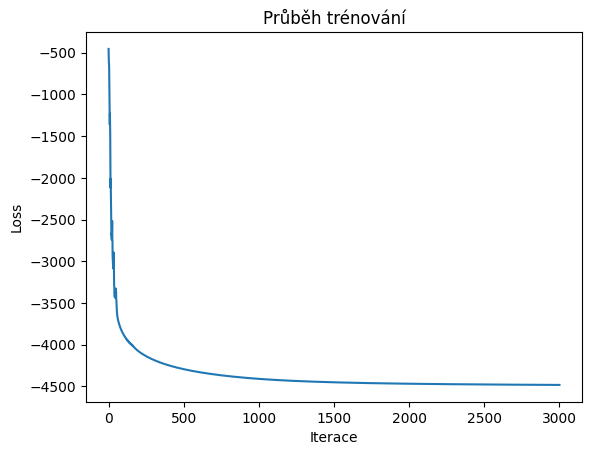

sigmoid testovaci mnozina : 0.936


In [21]:
tlp = TwoLayerPerceptron(
    input_layer_size=input_layer_size,
    hidden_layer_size=hidden_layer_size,
    output_size=output_size,
    activation_function=sigmoid,
    activation_function_derivation=sigmoid_grad,
)
#################################################################
# ZDE DOPLNIT
train_gd(tlp, x, y, nIter=3001, alpha=0.001)
accuracy = tlp.accuracy(xTest, yTest)
#################################################################
print(f"sigmoid testovaci mnozina : {accuracy}")

Trénování modelu s aktivační funkcí ReLU:

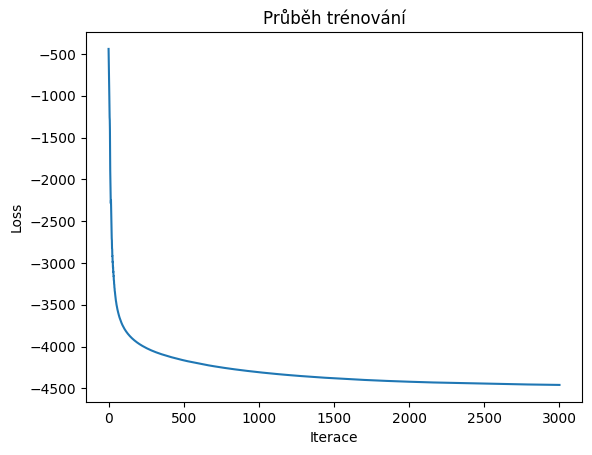

relu testovaci mnozina : 0.928


In [22]:
tlp = TwoLayerPerceptron(
    input_layer_size=input_layer_size,
    hidden_layer_size=hidden_layer_size,
    output_size=output_size,
    activation_function=relu,
    activation_function_derivation=relu_grad,
)
#################################################################
# ZDE DOPLNIT
train_gd(tlp, x, y, nIter=3001, alpha=0.0001)
accuracy = tlp.accuracy(xTest, yTest)
#################################################################
print(f"relu testovaci mnozina : {accuracy}")

# Bonus: PyTorch a MNIST

Data: Číslovky z datasetu MNIST z bonusové části 7. cvičení (tam si je můžete prohlédnout).

**Dosáhněte accuracy > 97 %**

Tip: Menší batche napomáhají generalizaci.

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

In [24]:
npzfile = np.load('data/data_07_mnist_train.npz') 

data = npzfile['data']
ref = npzfile['ref']

# Převod na objekty knihovny PyTorch
data = torch.Tensor(data)
ref = torch.Tensor(ref).long()

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_07_mnist_train.npz'

In [ ]:
npzfile = np.load('data/data_07_mnist_test.npz') 

test_data = npzfile['data']
test_ref = npzfile['ref']

# Převod na objekty knihovny PyTorch
test_data = torch.Tensor(test_data)
test_ref = torch.Tensor(test_ref).long()

In [ ]:
# Normalizace hodnot pixelů (na základě statistických odhadů z trénovacích dat)
mean = data.mean()
std = data.std()
data = (data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
# Definice modelu

#################################################################
# ZDE DOPLNIT
input_layer_size = ... 
hidden_layer_size = ...
output_size = ...
#################################################################

model = nn.Sequential(
    nn.Linear(input_layer_size, hidden_layer_size),
    nn.ReLU(),
    nn.Linear(hidden_layer_size, output_size),
    # SOFTMAX se nepřidává! Kriteriální funkce ho počítá sama. Výstupem sítě jsou tzv. logity.
)

print(model)

# Konfigurace hyperparametrů trénování.
# Optimizér provádí zvolenou metodu optimalizace sítě (SGD / SGD + momentum / ADAM / jiné).
# Parametr weight_decay je lmbd z našeho kódu.
#################################################################
# ZDE DOPLNIT
num_epochs = ...
batch_size = ...
optimizer = optim.SGD(model.parameters(), lr=..., weight_decay=..., momentum=...)
# optimizer = optim.Adam(...)
# optimizer = optim.AdamW(...)
#################################################################

# Kriteriální funkce: počítá softmax a cross-entropy loss.
criterion = nn.CrossEntropyLoss()

# Nastaví model do trénovacího módu (důležité pro některé typy vrstev, např. Dropout nebo BatchNorm).
model.train()

losses = np.zeros(num_epochs)
num_batches = data.size(0) // batch_size

for epoch in range(num_epochs):
    # Zamíchání dat
    permutation = torch.randperm(data.size(0))
    
    epoch_loss = 0.0
    
    # Smyčka přes minibatche
    for i in range(0, data.size(0), batch_size):
        indices = permutation[i : i + batch_size]
        batch_x, batch_y = data[indices], ref[indices]
        
        # Gradienty jsou uloženy u vah, kterých se týkají. Je potřeba je v každé iteraci explicitně vynulovat, jinak se akumulují.
        optimizer.zero_grad()
        
        # Ekvivalent naší funkce forward (bez softmax).
        logits = model(batch_x)
        
        # Výpočet průměrného lossu podle zvolené kriteriální funkce.
        loss = criterion(logits, batch_y)
        
        # Spočítá gradienty. Ty nejsou výstupem funkce, ale jsou uloženy u vah, kterých se týkají.
        loss.backward()
        
        # Aktualizuje váhy podle zvolené metody.
        optimizer.step()
        
        epoch_loss += loss.item()

    # Průměrný loss.
    losses[epoch] = epoch_loss / num_batches
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {losses[epoch]:.4f}")

show_loss(np.arange(num_epochs), losses, epoch=True)

In [ ]:
# Nastaví model do testovacího módu (důležité pro některé typy vrstev, např. Dropout nebo BatchNorm).
model.eval()

# torch.no_grad() vypne operace pro výpočet gradientu, které se provádí na pozadí, protože je zde nepotřebujeme.
with torch.no_grad():
    logits = model(test_data)
    predicted_classes = logits.argmax(1)
    acc = (predicted_classes == test_ref).float().mean()

print(f"Accuracy: {acc * 100}%")